In [ ]:
import joblib
import pandas as pd
import holidays from pandas.api.types import CategoricalDtype

In [2]:
df = pd.read_csv('traffic.csv',index_col=[0],parse_dates=[0])
df.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [3]:
df = df[df['Junction'] == 1]            
df = df.drop(columns=['ID', 'Junction']) 
df.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9


In [4]:
if(df.isnull().sum().sum()==0):
    print('No missing values.')
else:
    df.fillna(method='ffill',inplace=True)

No missing values.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_loaded = pd.read_csv("traffic_features_and_target.csv")

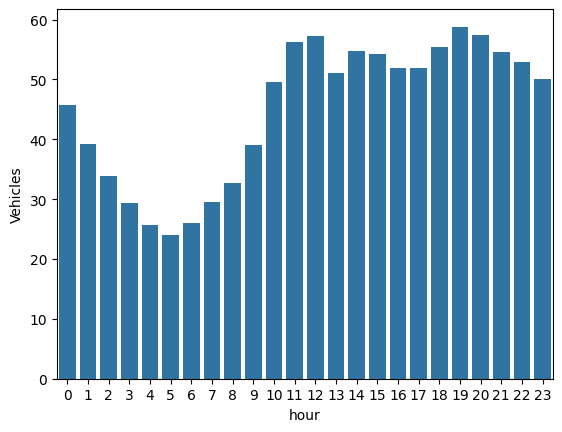

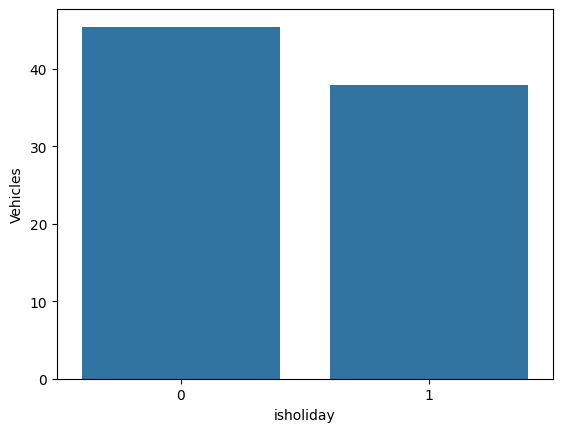

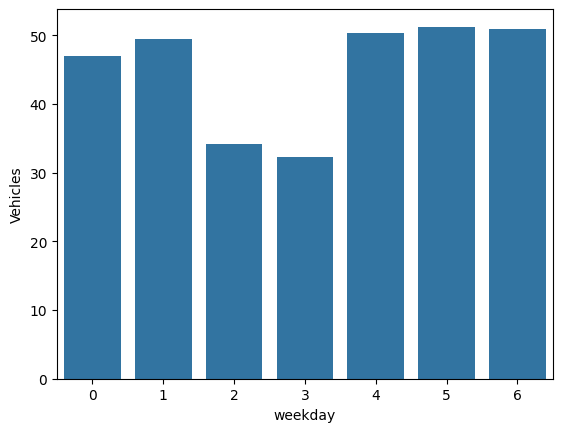

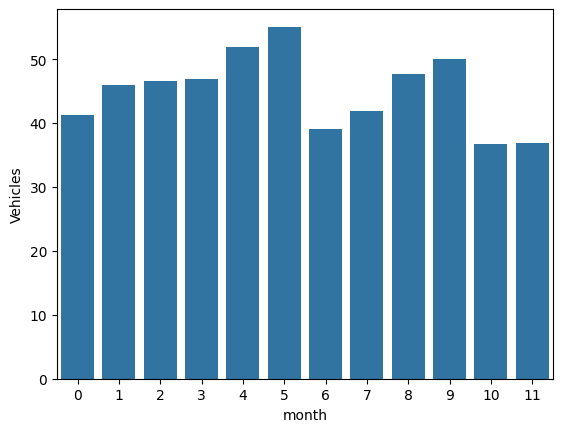

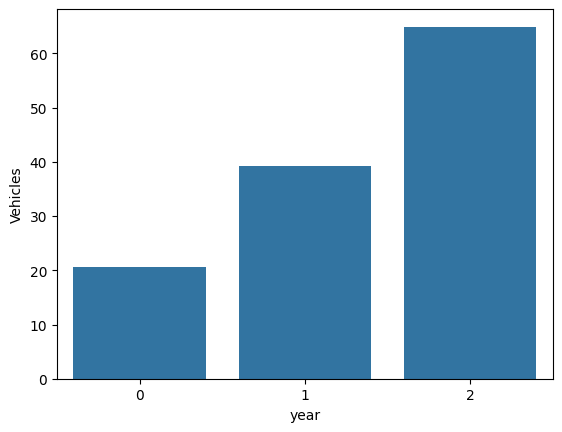

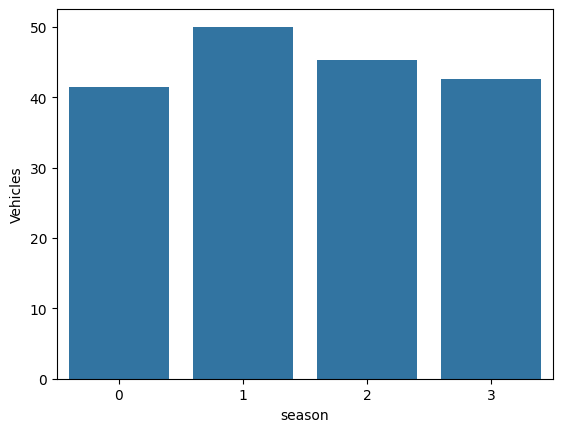

In [7]:
for column in ['hour','isholiday','weekday','month','year','season']:
    df_grouped = df_loaded.groupby(column)['Vehicles'].mean().reset_index()
    sns.barplot(df_grouped['Vehicles'])
    plt.xlabel(column)
    plt.show()

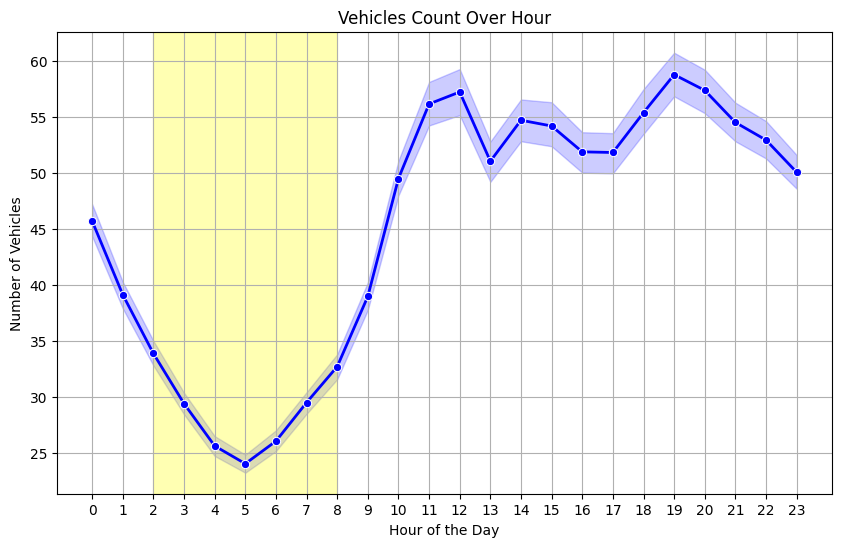

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_loaded, x='hour', y='Vehicles', marker='o', color='b', linewidth=2)
plt.axvspan(2, 8, color='yellow', alpha=0.3)
plt.title('Vehicles Count Over Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

C:\Users\Mohd. Jaffer Ali\AppData\Local\Temp\ipykernel_4672\1568518126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_loaded, x='weekday', y='Vehicles', inner="quart", palette='coolwarm')


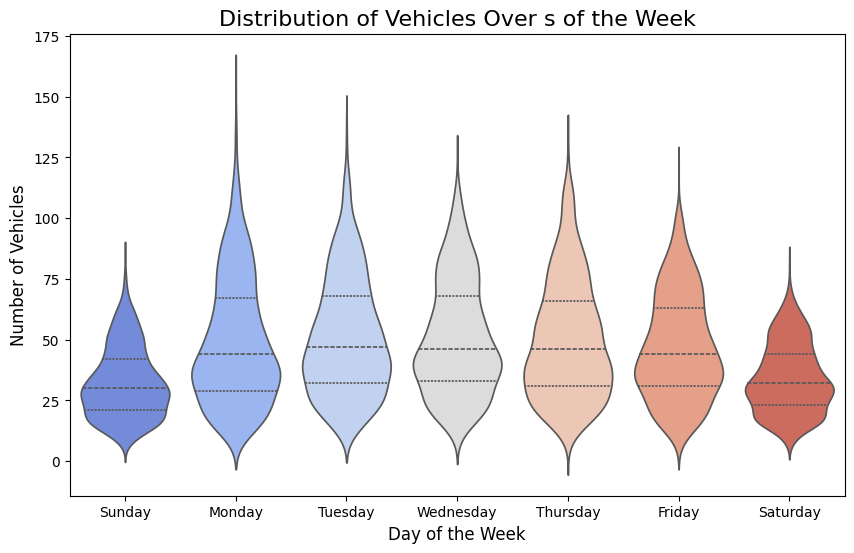

In [9]:
plt.figure(figsize=(10, 6))

# Violin plot to understand distribution of vehicle counts over hours
sns.violinplot(data=df_loaded, x='weekday', y='Vehicles', inner="quart", palette='coolwarm')

# Add a title and labels
plt.title('Distribution of Vehicles Over s of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)

# Show plot
plt.xticks(range(0, 7))  # Ensure all hours are shown
plt.show()

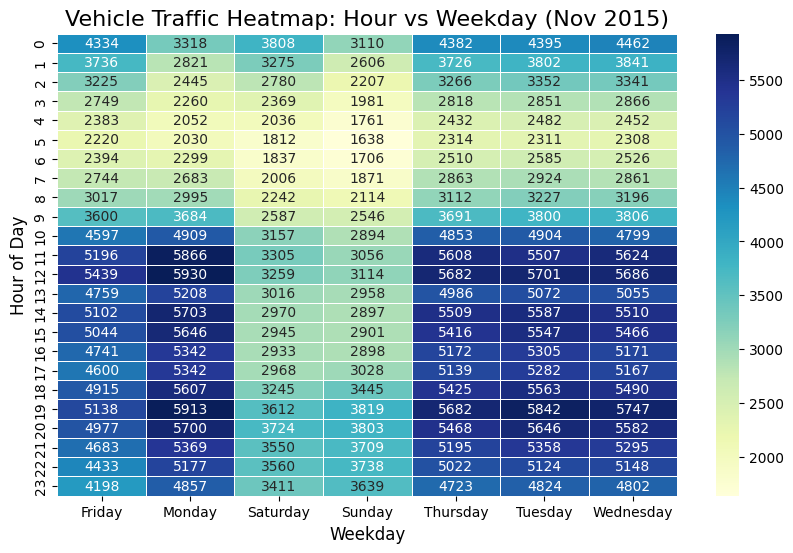

In [10]:
pivot_df = df_loaded.pivot_table(index='hour', columns='weekday', values='Vehicles', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)

# Add title and labels
plt.title('Vehicle Traffic Heatmap: Hour vs Weekday (Nov 2015)', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)

# Show plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def categorize_traffic_density(row):
    if row < 30:
        return 'Low'
    elif 30 <= row < 50:
        return 'Medium'
    else:
        return 'High'

df = pd.read_csv("traffic_features_and_target.csv")
# Apply categorization
df['TrafficDensity'] = df['Vehicles'].apply(categorize_traffic_density)
weekday_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
season_map = {
    'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3
}
df['weekday'] = df['weekday'].map(weekday_map)
df['season'] = df['season'].map(season_map)
# Prepare features and target
X = df.drop(["Vehicles", "TrafficDensity"], axis=1)
y = df["TrafficDensity"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Classification report and confusion matrix
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

        High       0.92      0.92      0.92      1023
         Low       0.87      0.88      0.87       858
      Medium       0.82      0.81      0.82      1038

    accuracy                           0.87      2919
   macro avg       0.87      0.87      0.87      2919
weighted avg       0.87      0.87      0.87      2919


Confusion Matrix:
 [[939   0  84]
 [  1 757 100]
 [ 80 117 841]]


In [12]:
joblib.dump(model, "final_model.pkl")

['final_model.pkl']

In [13]:
# Verify by reading the file back in
df_loaded = pd.read_csv('traffic_features_and_target.csv')
print(df_loaded.head())

   hour  isholiday weekday  month  year season  Vehicles
0     0      False  Sunday     11  2015   Fall        15
1     1      False  Sunday     11  2015   Fall        13
2     2      False  Sunday     11  2015   Fall        10
3     3      False  Sunday     11  2015   Fall         7
4     4      False  Sunday     11  2015   Fall         9


In [14]:
def predict_traffic_density(hour, isholiday, weekday, month, year, season):
    # Load the model
    model = joblib.load('final_model.pkl')
    
    # Map inputs
    weekday_map = {
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
    }
    season_map = {
        'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3
    }
    
    # Convert inputs to numeric
    weekday = weekday_map.get(weekday, -1)
    season = season_map.get(season, -1)
    isholiday = int(isholiday)

    # Check for invalid input
    if weekday == -1 or season == -1:
        raise ValueError("Invalid weekday or season")

    # Create input DataFrame
    input_data = pd.DataFrame([{
        'hour': hour,
        'isholiday': isholiday,
        'weekday': weekday,
        'month': month,
        'year': year,
        'season': season
    }])

    # Predict traffic density
    prediction = model.predict(input_data)
    return prediction[0]

# Example usage
result = predict_traffic_density(hour=10, isholiday=False, weekday="Monday", month=11, year=2023, season="Fall")
print("Predicted Traffic Density:", result)


Predicted Traffic Density: High
